Neural Network from Scratch 

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

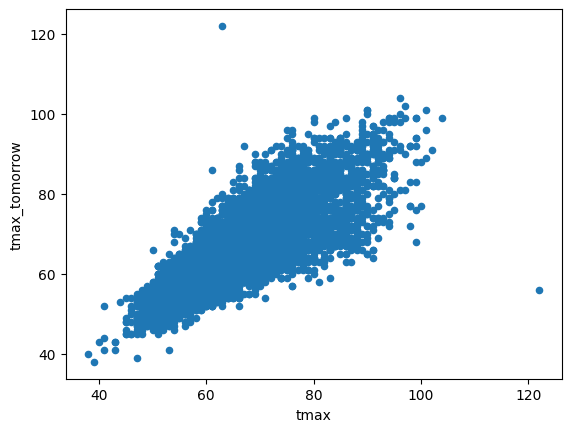

In [7]:
import pandas as pd 

data = pd.read_csv("../Numpy Fundamentals/clean_weather.csv", index_col=0)
data = data.ffill()

data.plot.scatter("tmax", "tmax_tomorrow")

In [3]:
data.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


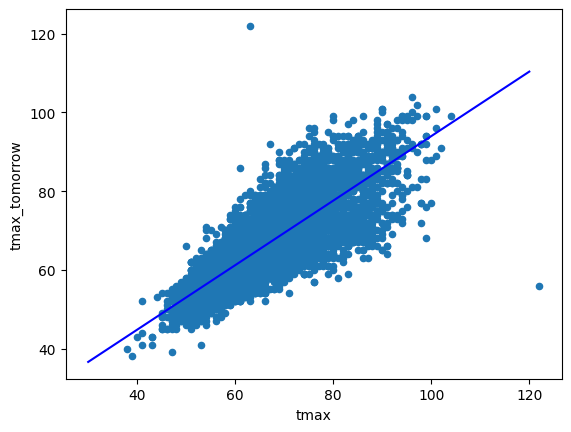

In [11]:
import matplotlib.pyplot as plt

data.plot.scatter("tmax", "tmax_tomorrow")

prediction = lambda x, w1=.82, b=11.99: x * w1 + b

plt.plot([30, 120], [prediction(30), prediction(120)], 'blue')

In [16]:
import numpy as np 

def mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

print(mse(data["tmax_tomorrow"], prediction(data["tmax"])))
print(mse(data["tmax_tomorrow"], prediction(data["tmax"], .82, 13)))


22.897335324598416
24.118285439336727


/var/folders/mz/9zwpzjqs6m35hjp757412fjh0000gn/T/ipykernel_9126/2199577335.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_ratio = ratios.groupby(tmax_bins).mean()
/var/folders/mz/9zwpzjqs6m35hjp757412fjh0000gn/T/ipykernel_9126/2199577335.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_tmax = data["tmax"].groupby(tmax_bins).mean()


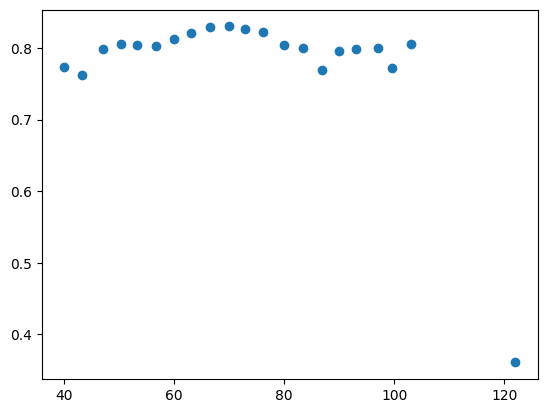

In [17]:
tmax_bins = pd.cut(data["tmax"], 25)

ratios = (data["tmax_tomorrow"] - 11.99) / data["tmax"]
binned_ratio = ratios.groupby(tmax_bins).mean()

binned_tmax = data["tmax"].groupby(tmax_bins).mean()

plt.scatter(binned_tmax, binned_ratio)

A nonlinear transformation on top of the linear transformation
Multiple layers, which can capture interactions between features
Multiple hidden units, which each have slightly different linear and nonlinear transformations

$y = wx + b$

$y = relu(wx + b)$

In [ ]:
#ACTIVATION FUNCTIONS

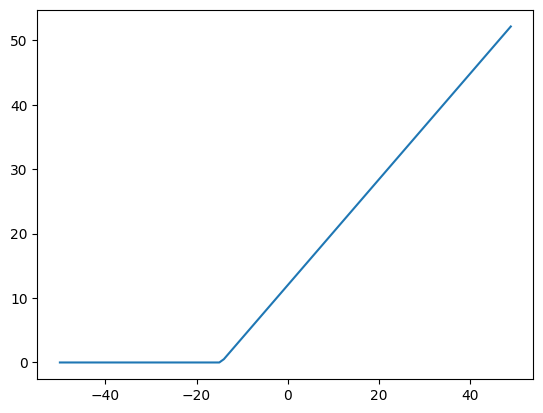

In [18]:
temps = np.arange(-50,50)

plt.plot(temps, np.maximum(0, prediction(temps)))

In [18]:
#MULTIPLE LAYERS

$\hat{y} = w_{2} relu(w_{1}x + b_{1}) + b_{2}$

(0.0, 40.0)

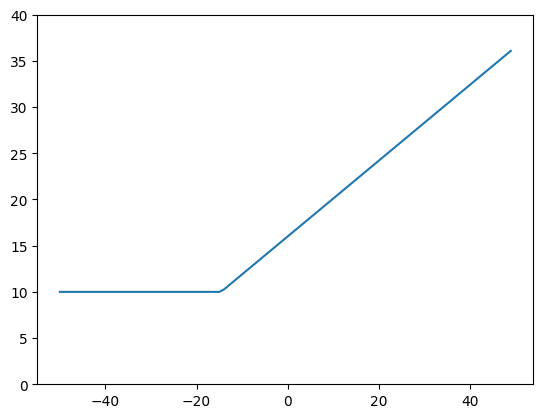

In [19]:
temps = np.arange(-50,50)

layer1 = np.maximum(0, prediction(temps))
layer2 = prediction(layer1, .5, 10)

plt.plot(temps, layer2)

plt.ylim((0,40))

In [20]:
#MULTIPLE HIDDEN UNITS

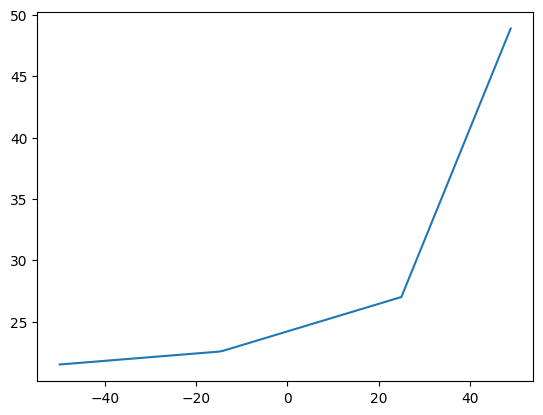

In [21]:
layer1_1 = np.maximum(0, prediction(temps))

layer1_2 = np.maximum(0, prediction(temps, .1, 10))

layer1_3 = np.maximum(0, prediction(temps, 2, -50))

layer2 = layer1_1 * .1 + layer1_2 * .3 + layer1_3 * .4 + 20

plt.plot(temps, layer2)

In [23]:
layer1_2

array([ 5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,
        6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,
        7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,
        8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,
        9.4,  9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4,
       10.5, 10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5,
       11.6, 11.7, 11.8, 11.9, 12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6,
       12.7, 12.8, 12.9, 13. , 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7,
       13.8, 13.9, 14. , 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8,
       14.9])

In [22]:
#insert image

In [23]:
#THE FORWARD PASS

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

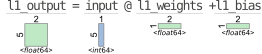

In [27]:
import tsensor

input = np.array([[80], [90], [100], [-20], [-10]])

l1_weights = np.array([[.82, .1]])

l1_bias = np.array([[11.99, 10]])

with tsensor.explain():
    l1_output = input @ l1_weights +l1_bias

In [29]:
l1_activated = np.maximum(l1_output, 0)

In [30]:
l1_activated

array([[77.59, 18.  ],
       [85.79, 19.  ],
       [93.99, 20.  ],
       [ 0.  ,  8.  ],
       [ 3.79,  9.  ]])

$layer_{1} = relu(XW_{1} + B_{1}) $

$\hat{y}=W_{2}relu(XW_{1} + B_{1}) + B_{2}$

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

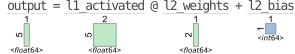

array([[47.395],
       [51.695],
       [55.995],
       [ 6.6  ],
       [ 8.695]])

In [33]:
l2_weights = np.array([
    [.5],
    [.2]
])

l2_bias = np.array([[5]])

with tsensor.explain():
    output = l1_activated @ l2_weights + l2_bias

output

In [34]:
tmax = np.array([[80], [90], [100], [-20], [-10]])
tmax_tomorrow = np.array([[83], [89], [95], [-22], [-9]]) 

In [35]:
tmax_tomorrow

array([[ 83],
       [ 89],
       [ 95],
       [-22],
       [ -9]])

In [36]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

In [37]:
mse(tmax_tomorrow, output)

array([[1267.716025],
       [1391.663025],
       [1521.390025],
       [ 817.96    ],
       [ 313.113025]])

In [38]:
def mse_grad(actual, predicted):
    return predicted - actual

In [39]:
mse_grad(tmax_tomorrow, output)

array([[-35.605],
       [-37.305],
       [-39.005],
       [ 28.6  ],
       [ 17.695]])

In [40]:
# THE BACKWARD PASS

In [41]:
output_gradient = mse_grad(tmax_tomorrow, output)

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

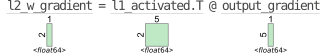

array([[-9562.0038],
       [-1741.73  ]])

In [43]:
from tsensor import explain as exp 

with exp():
    l2_w_gradient = l1_activated.T @ output_gradient

l2_w_gradient 

$\frac{\partial L}{\partial W_{2}}$

$$\frac{\partial L}{\partial W_{2}}=\partial L\frac{\partial (XW-{2})}{\partial W_{2}}$$

$\frac{\partial L}{\partial XW_{2}}$

In [44]:
from sympy import diff, symbols

x, w = symbols('X, W')
sympy_output = x * w
diff(sympy_output, w)

X

$\frac{\partial L}{\partial W_{2}} = \partial LX $ 

In [ ]:
# LAYER 1 GRADIENTS

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

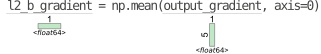

array([-13.124])

In [49]:
with exp():
    l2_b_gradient = np.mean(output_gradient, axis=0)

l2_b_gradient

In [51]:
l2_weights

array([[0.5],
       [0.2]])

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

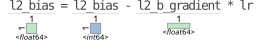

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

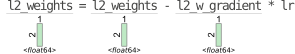

array([[0.59562004],
       [0.2174173 ]])

In [52]:
lr = 1e-5

with exp():
    l2_bias = l2_bias - l2_b_gradient * lr
    l2_weights = l2_weights - l2_w_gradient * lr

l2_weights

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

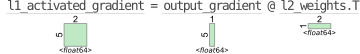

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [ 17.03473309,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [53]:
with exp():
    l1_activated_gradient = output_gradient @ l2_weights.T
l1_activated_gradient

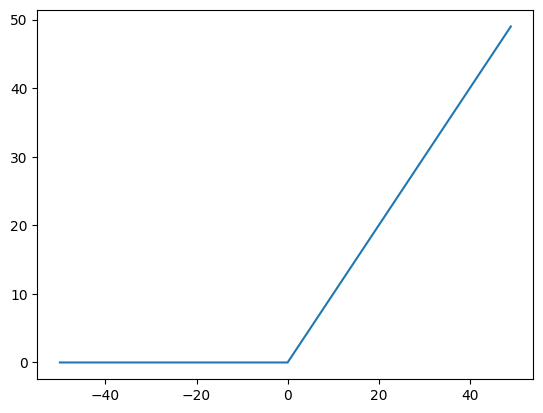

In [55]:
temps = np.arange(-50, 50)

plt.plot(temps, np.maximum(0, temps))

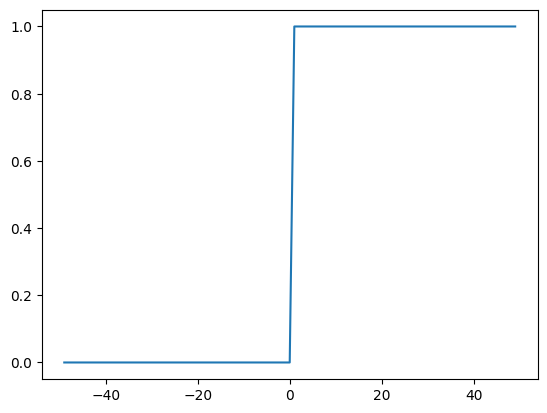

In [57]:
activation = np.maximum(0, temps)

plt.plot(temps[1:], activation[1:] - np.roll(activation, 1)[1:])

findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas' not found.
findfont: Font family 'Consolas'

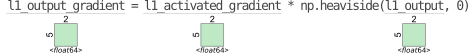

array([[-21.20705145,  -7.74114297],
       [-22.21960552,  -8.11075238],
       [-23.23215958,  -8.48036179],
       [  0.        ,   6.21813478],
       [ 10.53949657,   3.84719912]])

In [58]:
with exp():
    l1_output_gradient = l1_activated_gradient * np.heaviside(l1_output, 0)
l1_output_gradient

In [59]:
l1_w_gradient = input.T @ l1_output_gradient
l1_b_gradient = np.mean(l1_output_gradient, axis=0)

l1_weights -= l1_w_gradient * lr
l1_bias -= l1_b_gradient * lr

In [60]:
l1_weights

array([[0.8812494, 0.1236013]])

In [61]:
l1_bias

array([[11.99011224, 10.00002853]])

In [62]:
# NETWORK TRAINING ALGORITHM 

1. Run the network forward pass, and get the output:
2. Compute gradient with respect to the outputs of the network. (the `mse_grad` function)
3. For each layer in the network:
    - Compute the gradient with respect to the pre-nonlinearity output (if the later has a nonlinearity)
    - Compute the gradient with respect to the weights
    - Compute the gradient with respect to the biases
    - Compute the gradient with respect to the inputs to the layer
4. Update the parameters in the network using gradient descent 

In [64]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

split_data = np.split(data, [int(.7 * len(data)), int(.85 * len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [65]:
# FULL NETWORK IMPLEMENTATION

In [67]:
def init_layers(inputs):
    layers = []
    for i in range(1, len(inputs)):
        layers.append([
            np.random.rand(inputs[i-1], inputs[i]) / 5 - .1, 
            np.ones((1, inputs[i]))
        ])
    return layers

layer_conf = [3,10,10,1]

layers = init_layers(layer_conf)

In [77]:
def forward(batch, layers):
    hiddens = [batch.copy()]
    for i in range(len(layers)):
        batch = np.matmul(batch, layers[i][0]) + layers[i][1]
        if i < len(layers) - 1:
            batch = np.maximum(batch, 0)
        hiddens.append(batch.copy())
    return batch, hiddens

In [78]:
def mse(actual, predicted):
    return (actual - predicted) ** 2

def mse_grad(actual, predicted):
    return predicted - actual

In [79]:
def backward(layers, hidden, grad, lr):
    for i in range(len(layers)-1, -1, -1):
        if i != len(layers) - 1:
            grad = np.multiply(grad, np.heaviside(hidden[i+1], 0))

        w_grad = hidden[i].T @ grad
        b_grad = np.mean(grad, axis=0)
        layers[i][0] -= w_grad * lr
        layers[i][1] -= b_grad * lr

        grad = grad @ layers[i][0].T
    return layers

In [80]:
#TRAINING LOOP

In [82]:
lr = 1e-6 
epochs = 10
batch_size = 8

layers = init_layers(layer_conf)

for epoch in range(epochs):
    epoch_loss = 0

    for i in range(0, train_x.shape[0], batch_size):
        x_batch = train_x[i:(i+batch_size)]
        y_batch = train_y[i:(i+batch_size)]

        pred, hidden = forward(x_batch, layers)

        loss = mse_grad(y_batch, pred)
        epoch_loss += np.mean(loss ** 2)

        layers = backward(layers, hidden, loss, lr)

    valid_preds, _ = forward(valid_x, layers)

    print(f"Epoch {epoch} Train MSE: {epoch_loss / (train_x.shape[0] / batch_size)} Valid MSE: {np.mean(mse(valid_preds, valid_y))}")

Epoch 0 Train MSE: 3334.35974774147 Valid MSE: 1772.0449353928282
Epoch 1 Train MSE: 370.6700261432515 Valid MSE: 26.914912697280755
Epoch 2 Train MSE: 23.570169634089677 Valid MSE: 21.417931661061697
Epoch 3 Train MSE: 22.50637859343853 Valid MSE: 20.88710116806452
Epoch 4 Train MSE: 22.21368756369892 Valid MSE: 20.778855289635615
Epoch 5 Train MSE: 22.138085324321484 Valid MSE: 20.76199242153073
Epoch 6 Train MSE: 22.117330728908968 Valid MSE: 20.762518075510908
Epoch 7 Train MSE: 22.110215214768882 Valid MSE: 20.764563208716815
Epoch 8 Train MSE: 22.106352198197595 Valid MSE: 20.766054530704036
Epoch 9 Train MSE: 22.103673465335778 Valid MSE: 20.767257438152132


In [84]:
pred, _ = forward(test_x, layers)
np.mean(mse(test_y, pred))

22.068463788677594